## Import Library

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Data Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
# checking shape
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
classes=['Airplane','Automobile','bird','cat','deer','dog','frog','hourse','ship','truck']

In [7]:
#Scaling of data
x_train_re=x_train/255
x_test_re=x_test/255

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Data visualization

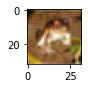

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
plt.imshow(x_train[0])

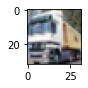

In [11]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[1])

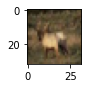

In [12]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[3])

## Model Building

In [13]:
## BY using CNN
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
cnn.fit(x_train_re,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 45ms/step - loss: 1.9859 - accuracy: 0.2589
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3701 - accuracy: 0.5072
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9462 - accuracy: 0.6668
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7331 - accuracy: 0.7408
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6239 - accuracy: 0.7801
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5435 - accuracy: 0.8085
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4790 - accuracy: 0.8325
Epoch 8/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.4251 - accuracy: 0.8498
Epoch 9/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.3718 - accuracy: 0.86920s - loss:
Epoch 10/10
1563/1563 [==============================]

In [15]:
## Predicting the data

In [32]:
y_predicted=cnn.predict(x_test_re)

In [33]:
y_predicted

array([[1.9575482e-06, 4.5475632e-09, 1.5492851e-06, ..., 1.0530472e-08,
        4.4019700e-07, 5.6628267e-09],
       [1.2835117e-05, 2.9908112e-04, 2.6633400e-11, ..., 2.7937581e-13,
        9.9968815e-01, 1.4444628e-08],
       [3.8017217e-02, 3.3217344e-01, 8.5991720e-04, ..., 2.7831589e-04,
        6.2560344e-01, 2.4471288e-03],
       ...,
       [6.2362215e-10, 7.5209128e-10, 5.0648616e-04, ..., 1.4234359e-03,
        2.8427840e-09, 1.6514937e-08],
       [9.9286705e-02, 7.3871620e-02, 3.0364865e-04, ..., 5.5783424e-03,
        1.1387781e-04, 2.6566144e-02],
       [3.6653844e-10, 3.6473689e-11, 2.6780553e-09, ..., 9.9994802e-01,
        4.3637680e-09, 5.2069959e-11]], dtype=float32)

In [34]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [35]:
# change y_predicted to readable form
y_predicted_re=[np.argmax(x) for x in y_predicted]
y_predicted_re

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 0,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 3,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 0,
 8,
 6,
 3,
 0,
 8,
 7,
 6,
 5,
 3,
 7,
 3,
 6,
 0,
 6,
 2,
 1,
 2,
 5,
 7,
 2,
 5,
 8,
 8,
 9,
 2,
 7,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 9,
 9,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 2,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 2,
 5,
 8,
 5,
 1,
 7,
 8,
 0,
 0,
 3,
 5,
 0,
 4,
 1,
 9,
 9,
 9,
 2,
 9,
 7,
 2,
 0,
 4,
 5,
 6,
 5,
 8,
 7,
 6,
 6,
 7,
 5,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 0,
 1,
 6,
 6,
 8,
 7,
 8,
 4,
 9,
 0,
 9,
 9,
 8,
 8,
 9,
 9,
 5,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 0,
 8,
 6,
 2,
 3,
 0,
 6,
 8,
 0,
 1,
 7,
 6,
 8,
 8,
 5,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 0,
 3,
 9,
 8,
 7,
 0,
 9,
 9,
 4,
 7,
 4,
 9,
 4,
 4,
 9,
 7,
 2,
 3,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 0,
 5,
 1,
 1,
 8,
 9,
 0,
 6,
 1,
 8,
 2,
 0,


In [36]:
y_predicted_a=np.array(y_predicted_re)

In [37]:
y_predicted_a

array([3, 8, 8, ..., 5, 3, 7], dtype=int64)

In [38]:
y_test_final=y_test.reshape([-1,])

In [39]:
y_test_final

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test_final,y_predicted_a))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.84      0.76      0.80      1000
           2       0.59      0.60      0.59      1000
           3       0.53      0.45      0.49      1000
           4       0.67      0.58      0.62      1000
           5       0.55      0.62      0.58      1000
           6       0.84      0.71      0.77      1000
           7       0.67      0.77      0.72      1000
           8       0.83      0.78      0.80      1000
           9       0.68      0.83      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



## Draw Confusion Matrix

In [42]:
cm=tf.math.confusion_matrix(labels=y_test_final,predictions=y_predicted_a)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[767,  16,  48,  16,  13,   9,   4,  18,  61,  48],
       [ 27, 757,   7,  11,   4,   4,   6,   8,  29, 147],
       [ 66,   7, 600,  63,  78,  70,  35,  47,  15,  19],
       [ 30,   9,  75, 454,  58, 231,  36,  61,  12,  34],
       [ 34,   3, 103,  64, 582,  57,  41, 102,   6,   8],
       [ 20,   9,  66, 131,  36, 618,  10,  86,   4,  20],
       [ 14,   6,  59,  66,  45,  47, 712,  18,   8,  25],
       [ 19,   4,  28,  27,  43,  71,   5, 767,   3,  33],
       [ 76,  44,  17,   9,   7,   9,   0,  11, 775,  52],
       [ 36,  48,  14,   8,   2,  16,   2,  19,  23, 832]])>

Text(69.0, 0.5, 'Truth')

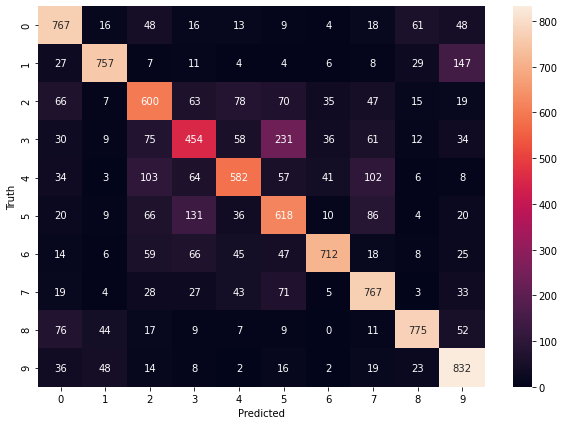

In [43]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Test Model By Example

In [44]:
def predict_class(x):
    return classes[x]

In [46]:
predict_class(y_predicted_re[0])

'cat'

In [47]:
predict_class(y_test_final[0])

'cat'